# **FAANG Stocks Covid -19 - Data Science in Everyday Industries - Part 2**

#### **1. Problem Statement and Data Collection**

***Can we predict the stock prices of FAANG companies during the COVID-19 pandemic based on historical trends and pandemic-related economic factors?***

Related Word Report - https://yotescollegeofidaho-my.sharepoint.com/:w:/g/personal/bathigesuthira_desil_yotes_collegeofidaho_edu/EdvjTupZdNhKl600w2jRsyMBnHMjAqBUbRCIVJWoy6ahdA?e=osfU7K

Dataset from Kaggle - https://www.kaggle.com/datasets/parisrohan/faang-stocks-covid190101202004012022/data

#### **2. Data Cleaning and Preprocessing**

In [152]:
# Importing the packaages
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns

!pip install pandasql
from pandasql import sqldf

In [153]:
# Loading the dataset and Checking for NA/missing values
df = pd.read_csv('/content/faang_stocks_pandemic_data.csv').dropna(axis=1, how='all')
df.isna().sum()

# It seems like all rows have no NA or misssing values.

# Convert the "Unnamed: 0" column to an index column and Rename as "Index".
df = df.rename(columns={'Unnamed: 0': 'Index'})
df = df.set_index('Index')

# Previewing the dataset
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Name
Index,,,,,,,,
683,2020-01-02,209.789993,206.270004,206.750000,209.779999,12077100.0,209.779999,Facebook
684,2020-01-03,210.399994,206.949997,207.210007,208.669998,11188400.0,208.669998,Facebook
685,2020-01-06,212.779999,206.520004,206.699997,212.600006,17058900.0,212.600006,Facebook
686,2020-01-07,214.580002,211.750000,212.820007,213.059998,14912400.0,213.059998,Facebook
687,2020-01-08,216.240005,212.610001,213.000000,215.220001,13475000.0,215.220001,Facebook


In [154]:
# Checking the number of columns
df.shape

(2840, 8)

In [155]:
# The "Date" column will be converted into a datetime format to facilitate time-based grouping, sorting.
df["Date"] = pd.to_datetime(df["Date"])

In [156]:
# Daily Price Range: Calculated as High - Low to assess daily volatility.
daily_price_range = df['High'] - df['Low']
df['Daily_Price_Range'] = daily_price_range
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Name,Daily_Price_Range
Index,,,,,,,,,
683,2020-01-02,209.789993,206.270004,206.750000,209.779999,12077100.0,209.779999,Facebook,3.519989
684,2020-01-03,210.399994,206.949997,207.210007,208.669998,11188400.0,208.669998,Facebook,3.449997
685,2020-01-06,212.779999,206.520004,206.699997,212.600006,17058900.0,212.600006,Facebook,6.259995
686,2020-01-07,214.580002,211.750000,212.820007,213.059998,14912400.0,213.059998,Facebook,2.830002
687,2020-01-08,216.240005,212.610001,213.000000,215.220001,13475000.0,215.220001,Facebook,3.630005


In [157]:
# Percent Change: ((Close - Open) )/Open  ×100 to measure daily returns.
percent_change = ((df['Close'] - df['Open']) / df['Open']) * 100
df['Percent_Change'] = percent_change
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Name,Daily_Price_Range,Percent_Change
Index,,,,,,,,,,
683,2020-01-02,209.789993,206.270004,206.750000,209.779999,12077100.0,209.779999,Facebook,3.519989,1.465537
684,2020-01-03,210.399994,206.949997,207.210007,208.669998,11188400.0,208.669998,Facebook,3.449997,0.704595
685,2020-01-06,212.779999,206.520004,206.699997,212.600006,17058900.0,212.600006,Facebook,6.259995,2.854383
686,2020-01-07,214.580002,211.750000,212.820007,213.059998,14912400.0,213.059998,Facebook,2.830002,0.112767
687,2020-01-08,216.240005,212.610001,213.000000,215.220001,13475000.0,215.220001,Facebook,3.630005,1.042254


In [158]:
# Moving Averages: Short-term (e.g., 5-day) and long-term (e.g., 30-day) moving averages for trends analysis.
df['5_Day_MA'] = df['Close'].rolling(window=5).mean()
df['30_Day_MA'] = df['Close'].rolling(window=30).mean()

# it appears that computing short term and long term averages for certain dates is not feasible, and we would replace those NaN values with 0.00 floats.
df['5_Day_MA'] = df['5_Day_MA'].fillna(0)
df['30_Day_MA'] = df['30_Day_MA'].fillna(0)

df.head(50)

,Date,High,Low,Open,Close,Volume,Adj Close,Name,Daily_Price_Range,Percent_Change,5_Day_MA,30_Day_MA
Index,,,,,,,,,,,,
683,2020-01-02,209.789993,206.270004,206.750000,209.779999,12077100.0,209.779999,Facebook,3.519989,1.465537,0.000000,0.000000
684,2020-01-03,210.399994,206.949997,207.210007,208.669998,11188400.0,208.669998,Facebook,3.449997,0.704595,0.000000,0.000000
685,2020-01-06,212.779999,206.520004,206.699997,212.600006,17058900.0,212.600006,Facebook,6.259995,2.854383,0.000000,0.000000
686,2020-01-07,214.580002,211.750000,212.820007,213.059998,14912400.0,213.059998,Facebook,2.830002,0.112767,0.000000,0.000000
687,2020-01-08,216.240005,212.610001,213.000000,215.220001,13475000.0,215.220001,Facebook,3.630005,1.042254,211.866000,0.000000
688,2020-01-09,218.380005,216.279999,217.539993,218.300003,12642800.0,218.300003,Facebook,2.100006,0.349366,213.570001,0.000000
689,2020-01-10,219.880005,217.419998,219.199997,218.059998,12119400.0,218.059998,Facebook,2.460007,-0.520073,215.448001,0.000000
690,2020-01-13,221.970001,219.210007,219.600006,221.910004,14463400.0,221.910004,Facebook,2.759995,1.051911,217.310001,0.000000
691,2020-01-14,222.380005,218.630005,221.610001,219.059998,13288900.0,219.059998,Facebook,3.750000,-1.150671,218.510001,0.000000


In [159]:
# Cumulative Volume: Running total of the traded volume for each stock.
df['Cumulative_Volume'] = df.groupby('Name')['Volume'].cumsum()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Name,Daily_Price_Range,Percent_Change,5_Day_MA,30_Day_MA,Cumulative_Volume
Index,,,,,,,,,,,,,
683,2020-01-02,209.789993,206.270004,206.750000,209.779999,12077100.0,209.779999,Facebook,3.519989,1.465537,0.000,0.0,12077100.0
684,2020-01-03,210.399994,206.949997,207.210007,208.669998,11188400.0,208.669998,Facebook,3.449997,0.704595,0.000,0.0,23265500.0
685,2020-01-06,212.779999,206.520004,206.699997,212.600006,17058900.0,212.600006,Facebook,6.259995,2.854383,0.000,0.0,40324400.0
686,2020-01-07,214.580002,211.750000,212.820007,213.059998,14912400.0,213.059998,Facebook,2.830002,0.112767,0.000,0.0,55236800.0
687,2020-01-08,216.240005,212.610001,213.000000,215.220001,13475000.0,215.220001,Facebook,3.630005,1.042254,211.866,0.0,68711800.0


In [160]:
# Company-Specific Filtering: Data will be filtered by the "Name" column to enable focused analysis for individual FAANG companies if necessary.
# Facebook
filtered_df_facebook = df[df['Name'] == 'Facebook']
filtered_df_facebook.head(6)

# Apple
filtered_df_apple = df[df['Name'] == 'Apple']
filtered_df_apple.head(6)

# Amazon
filtered_df_amazon = df[df['Name'] == 'Amazon']
filtered_df_amazon.head(6)

# Netflix
filtered_df_netflix = df[df['Name'] == 'Netflix']
filtered_df_netflix.head(6)

# Google
filtered_df_google = df[df['Name'] == 'Google']
filtered_df_google.head(6)

,Date,High,Low,Open,Close,Volume,Adj Close,Name,Daily_Price_Range,Percent_Change,5_Day_MA,30_Day_MA,Cumulative_Volume
Index,,,,,,,,,,,,,
683,2020-01-02,1368.680054,1346.489990,1348.410034,1368.680054,1363900.0,1368.680054,Google,22.190063,1.503253,578.006012,403.285003,1363900.0
684,2020-01-03,1373.750000,1347.319946,1348.000000,1361.520020,1170400.0,1361.520020,Google,26.430054,1.002969,771.946014,436.089670,2534300.0
685,2020-01-06,1398.319946,1351.000000,1351.630005,1397.810059,2338400.0,1397.810059,Google,47.319946,3.416619,975.214026,470.434672,4872700.0
686,2020-01-07,1403.500000,1391.560059,1400.459961,1395.109985,1716500.0,1395.109985,Google,11.939941,-0.382016,1179.318024,503.937338,6589200.0
687,2020-01-08,1411.849976,1392.630005,1394.819946,1405.040039,1765700.0,1405.040039,Google,19.219971,0.732718,1385.632031,537.745340,8354900.0
688,2020-01-09,1428.680054,1410.209961,1421.930054,1419.790039,1660000.0,1419.790039,Google,18.470093,-0.150501,1395.854028,571.921008,10014900.0


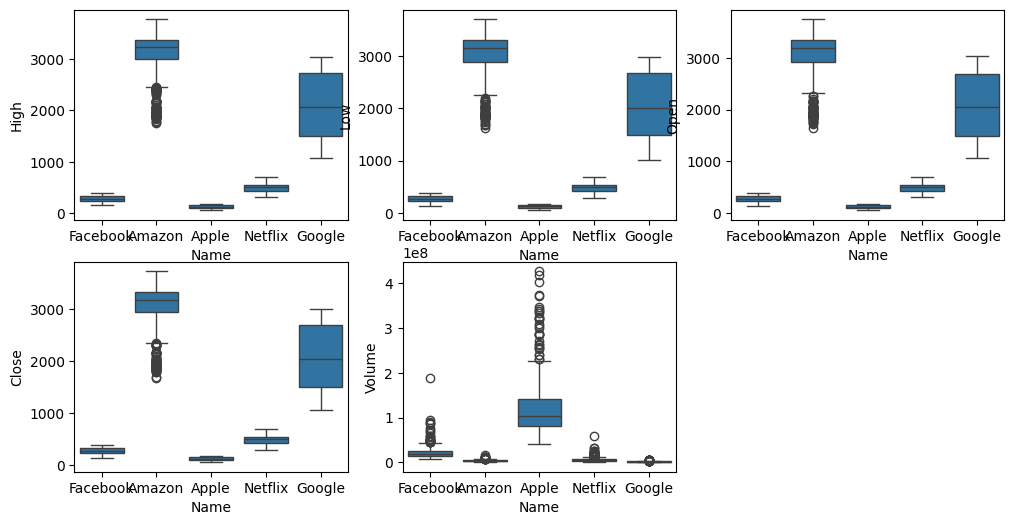

In [161]:
# Plotting boxplots for numerical columns like "High," "Low," "Open," "Close," and "Volume."
numerical_columns = ['High', 'Low', 'Open', 'Close', 'Volume']
plt.figure(figsize=(12, 6))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df['Name'], y=df[column])

In [162]:
# Using statistical methods such as the interquartile range (IQR) to detect extreme values.

# Select numerical columns to analyze
numerical_cols = ['High', 'Low', 'Open', 'Close', 'Volume']

# Loop through each numerical column to calculate and treat outliers
for col in numerical_cols:
    # Calculate Q1, Q3, and IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers detected in {col}: {len(outliers)}")

    # Treat outliers: Capping
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


Outliers detected in High: 0
Outliers detected in Low: 0
Outliers detected in Open: 0
Outliers detected in Close: 0
Outliers detected in Volume: 534


In [163]:
# Check if outliers exist in each numerical columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers detected in {col}: {len(outliers)}")


Outliers detected in High: 0
Outliers detected in Low: 0
Outliers detected in Open: 0
Outliers detected in Close: 0
Outliers detected in Volume: 0


In [164]:
# Checking the number of columns
df.shape

(2840, 13)

#### **3. Exploratory Data Analysis**

In [165]:
# Descriptive statistics for all columns
df.describe()

,Date,High,Low,Open,Close,Volume,Adj Close,Daily_Price_Range,Percent_Change,5_Day_MA,30_Day_MA,Cumulative_Volume
count,2840,2840.000000,2840.000000,2840.000000,2840.000000,2.840000e+03,2840.000000,2840.000000,2840.000000,2840.000000,2840.000000,2.840000e+03
mean,2021-02-15 20:21:58.309859328,1209.156423,1180.196246,1195.034564,1194.873321,1.908099e+07,1194.732621,28.960177,0.051626,1192.747466,1179.824736,9.921548e+09
min,2020-01-02 00:00:00,57.125000,53.152500,57.020000,56.092499,4.656000e+05,55.332169,0.669998,-7.479133,0.000000,0.000000,1.363900e+06
25%,2020-07-26 06:00:00,232.245003,224.582500,228.807503,229.680000,2.771200e+06,229.680000,5.567505,-0.927894,230.134000,236.514583,7.673600e+08
50%,2021-02-17 12:00:00,508.634995,495.050003,502.580002,502.234985,5.637150e+06,502.234985,13.755005,0.048036,503.479999,505.848165,1.953552e+09
75%,2021-09-09 06:00:00,2376.017517,2322.380005,2361.729980,2352.322449,2.657248e+07,2352.322449,42.707458,1.101077,2346.808545,2269.869171,8.086247e+09
max,2022-04-01 00:00:00,3773.080078,3696.790039,3744.000000,3731.409912,6.227439e+07,3731.409912,275.900146,11.173610,3708.648047,3574.354313,6.867152e+10
std,NaN,1212.303369,1185.486963,1199.645063,1198.823284,2.312850e+07,1198.950567,33.760596,1.776173,1196.604070,1185.748894,1.744081e+10


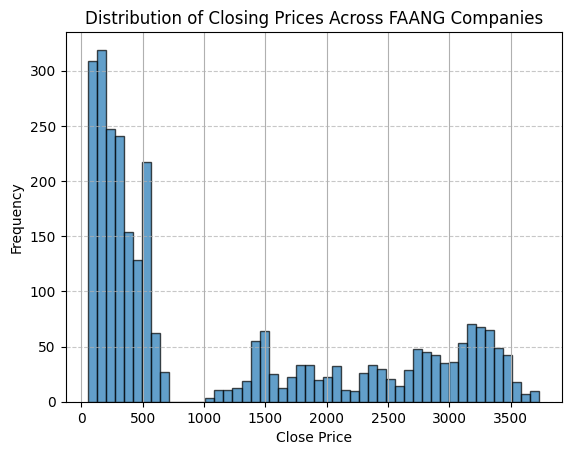

In [166]:
# Distribution of closing prices
df['Close'].hist(bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Closing Prices Across FAANG Companies')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# This graph shows the distribution of the closing prices of FAANG companies.
# It helps identify the range and frequency of closing prices during the pandemic.

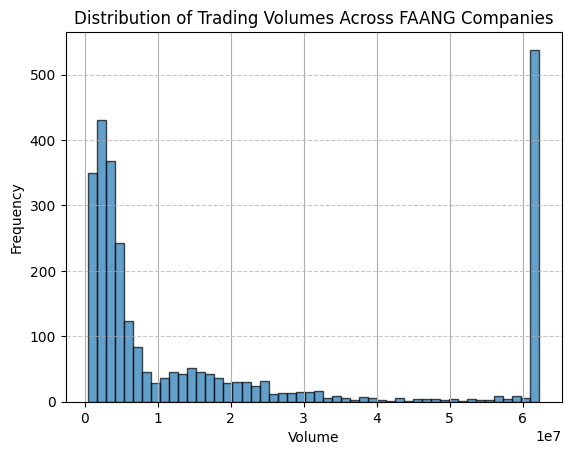

In [167]:
# Distribution of trading volumes
df['Volume'].hist(bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Trading Volumes Across FAANG Companies')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# This graph shows how trading volumes were distributed. It helps identify high-activity days and overall trading patterns.

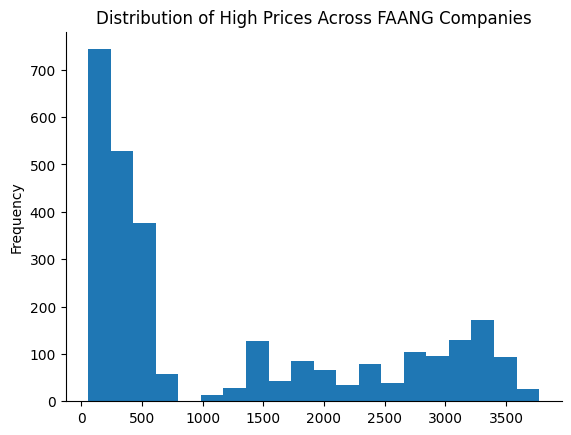

In [168]:
# Distribution of High prices
df['High'].plot(kind='hist', bins=20, title='Distribution of High Prices Across FAANG Companies')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

# This graph shows the distribution of the highest prices recorded daily, offering insight into stock price peaks.

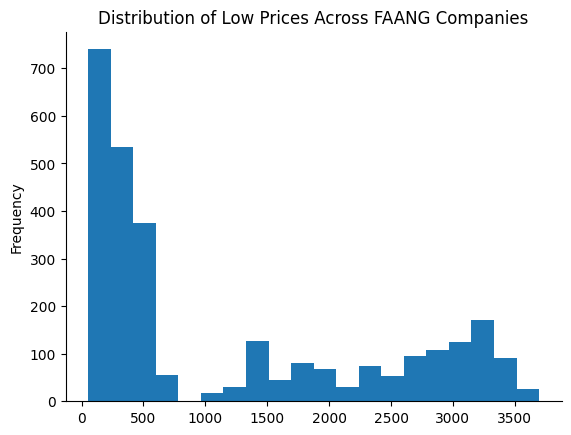

In [169]:
# Distribution of Low prices
df['Low'].plot(kind='hist', bins=20, title='Distribution of Low Prices Across FAANG Companies')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

# This graph illustrates the distribution of daily lowest prices, providing insight into stock price troughs.

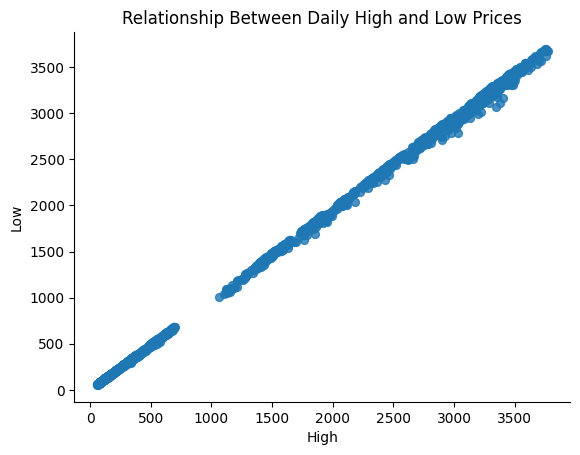

In [170]:
# High vs Low
df.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.title('Relationship Between Daily High and Low Prices')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

# This scatter plot shows the correlation between the daily high and low prices, indicating price volatility.

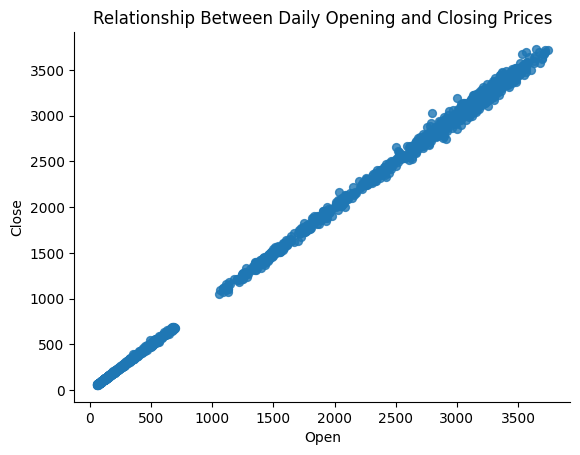

In [171]:
# Open vs Close
df.plot(kind='scatter', x='Open', y='Close', s=32, alpha=.8)
plt.title('Relationship Between Daily Opening and Closing Prices')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

# This scatter plot shows the relationship between opening and closing prices, highlighting intraday stock performance.

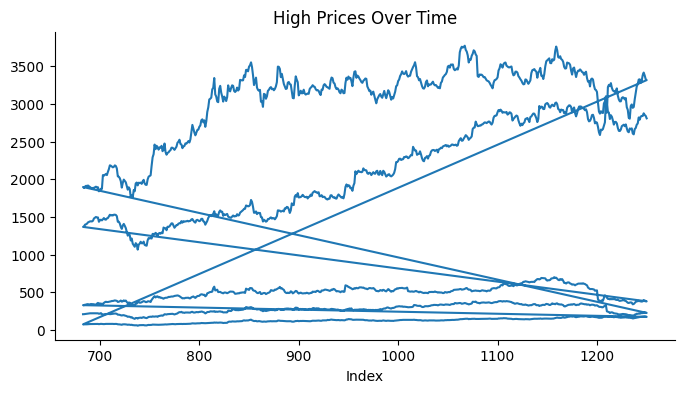

In [172]:
# Trends in High Prices Over Time
df['High'].plot(kind='line', figsize=(8, 4), title='High Prices Over Time')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

# This line graph shows the trend of daily high prices over time, revealing how stock highs evolved.

In [173]:
def _plot_series(series, series_name, i):
    """Plots a time series with a specific color."""
    ax = series.plot(x='Date', y='High', label=series_name, color=f'C{i}')

<ipython-input-174-28cb203027f2>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend(title='Name', bbox_to_anchor=(1, 1), loc='upper left')


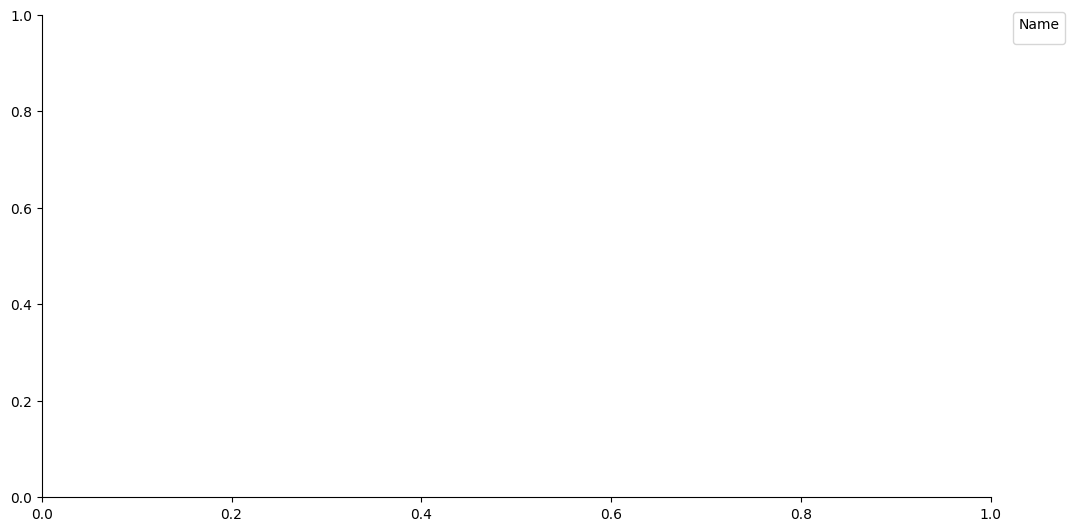

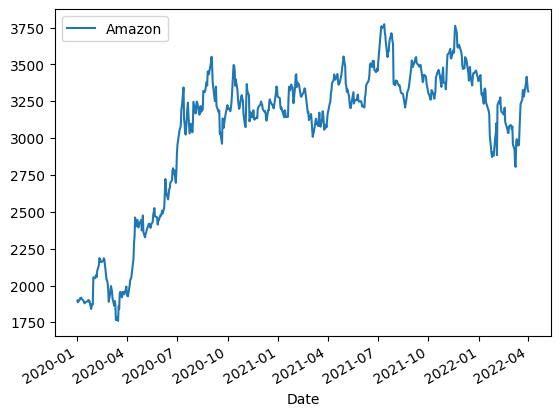

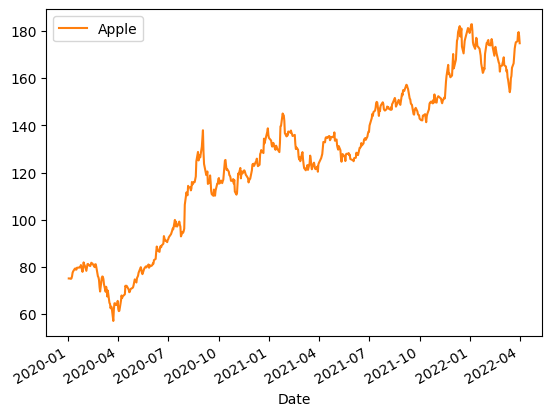

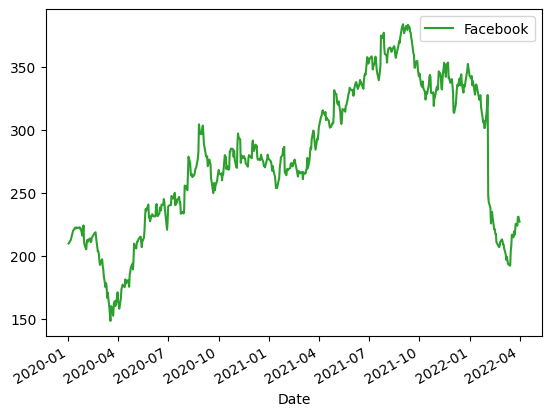

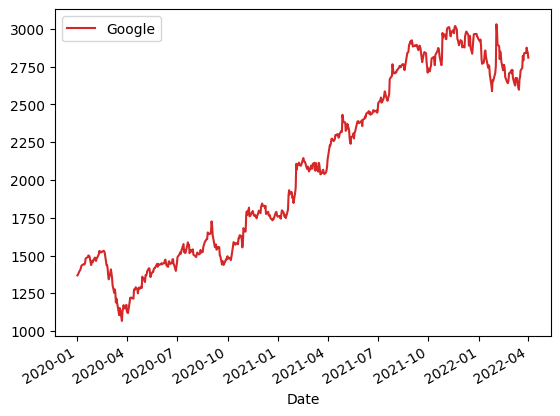

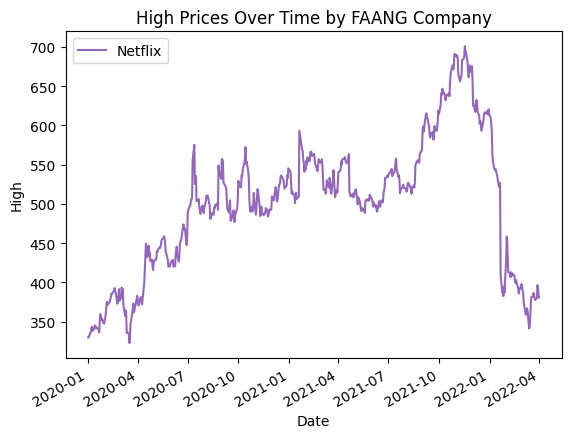

In [174]:
 # Trends in High Prices by Date for Each Company
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Name')):
    _plot_series(series, series_name, i)
fig.legend(title='Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
plt.ylabel('High')
plt.title('High Prices Over Time by FAANG Company')
plt.show()

# This graph shows the trends in high prices for each FAANG company over the given time frame, enabling comparisons.

<ipython-input-175-0443d771d6b7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Close', y='Name', inner='box', palette='Dark2')


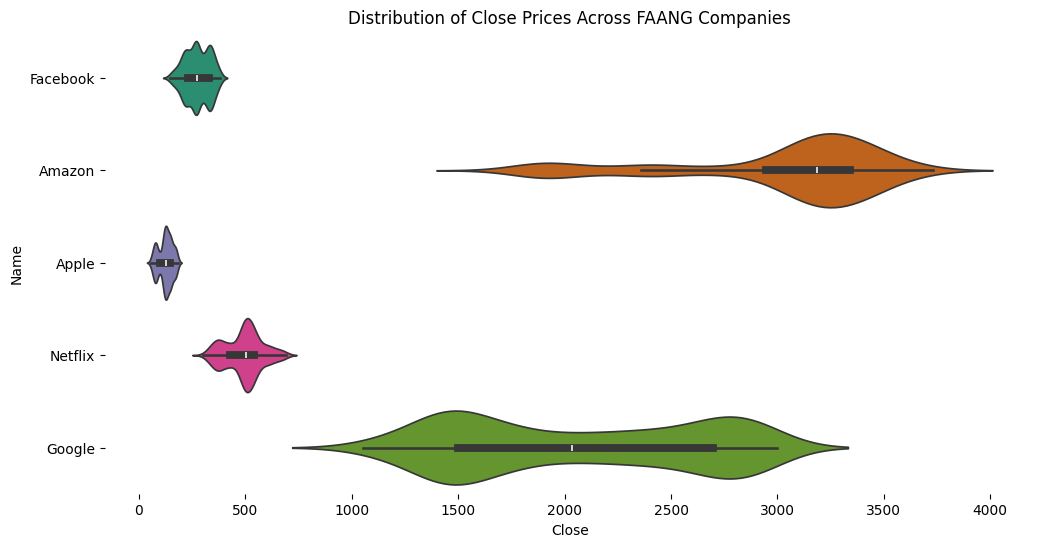

In [175]:
# Distribution of Close Prices by Company
figsize = (12, 1.2 * len(df['Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Close', y='Name', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('Distribution of Close Prices Across FAANG Companies')
plt.show()

# This violin plot shows the distribution of closing prices for each company, highlighting variability and medians.

<ipython-input-176-0f6b3cd77a3b>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend(title='Name', bbox_to_anchor=(1, 1), loc='upper left')


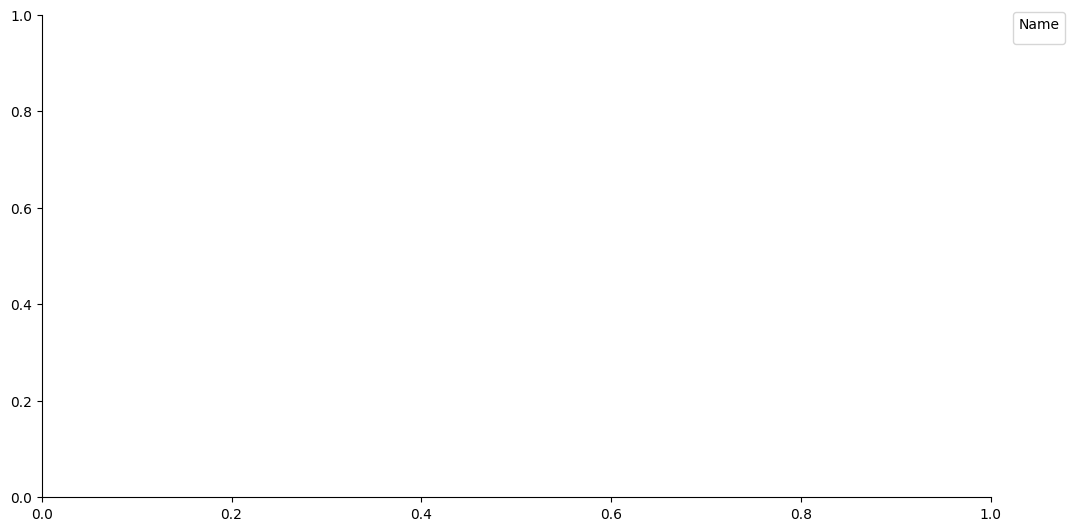

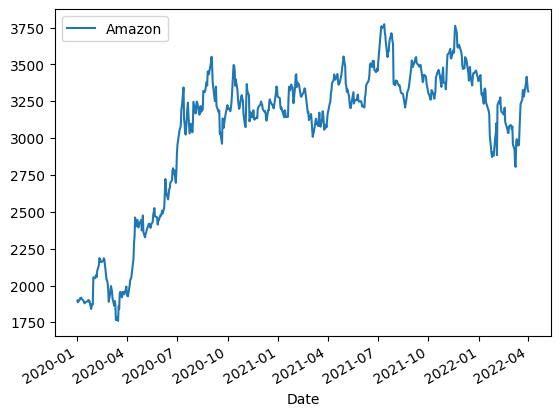

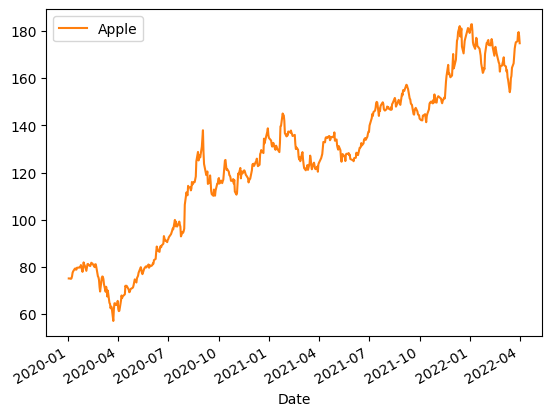

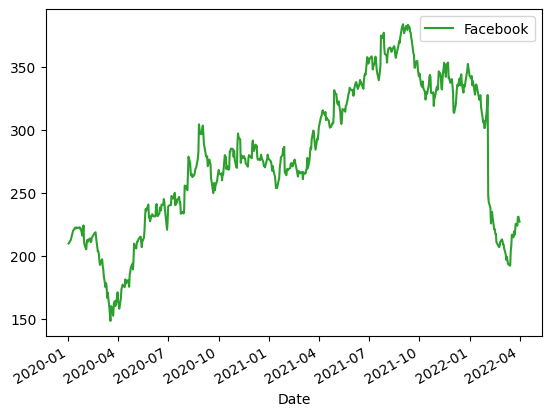

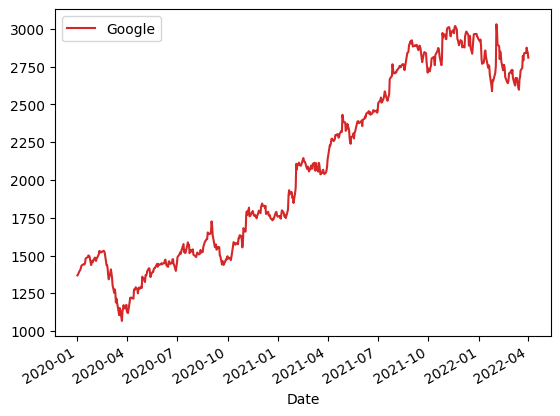

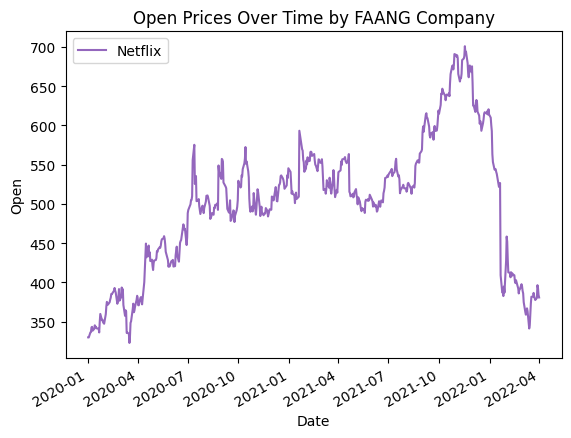

In [176]:
# Trends in Open Prices by Date for Each Company
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
for i, (series_name, series) in enumerate(df_sorted.groupby('Name')):
    _plot_series(series, series_name, i)
fig.legend(title='Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
plt.ylabel('Open')
plt.title('Open Prices Over Time by FAANG Company')
plt.show()

# This graph shows how opening prices for FAANG stocks changed over the pandemic, revealing trends.

<ipython-input-177-b168ba7864b3>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend(title='Name', bbox_to_anchor=(1, 1), loc='upper left')


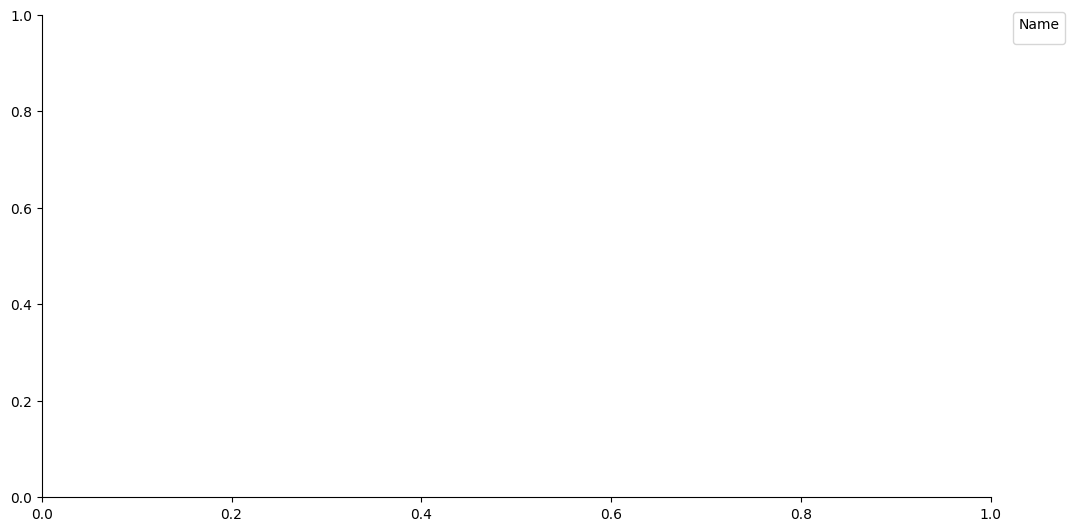

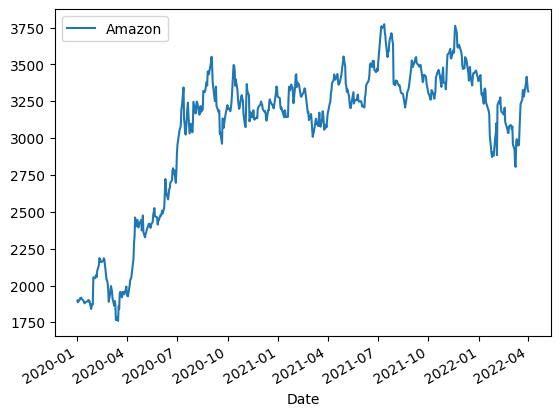

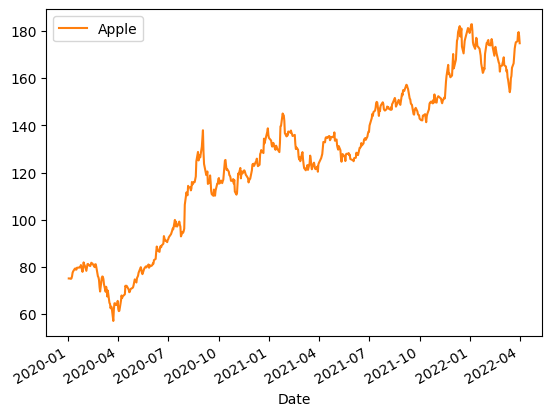

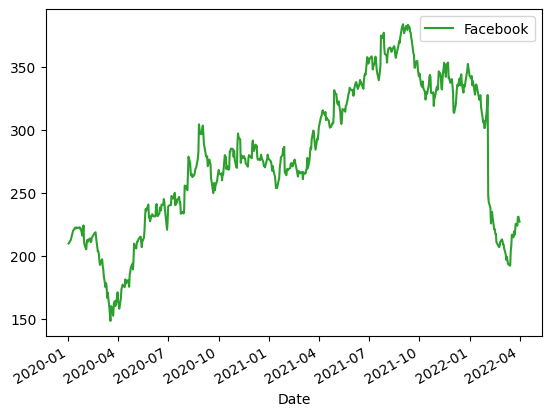

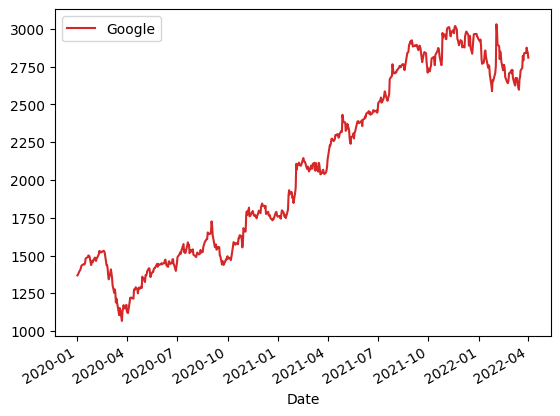

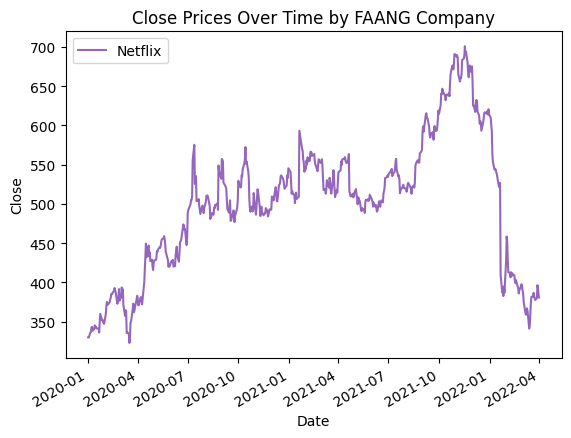

In [177]:
# Trends in Close Prices by Date for Each Company
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
for i, (series_name, series) in enumerate(df_sorted.groupby('Name')):
    _plot_series(series, series_name, i)
fig.legend(title='Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Close Prices Over Time by FAANG Company')
plt.show()

# This graph tracks the closing prices for FAANG companies over time, helping to identify key price trends.

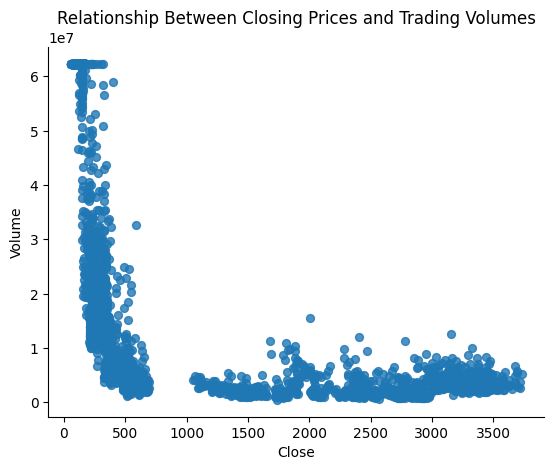

In [178]:
# Close vs Volume
df.plot(kind='scatter', x='Close', y='Volume', s=32, alpha=.8)
plt.title('Relationship Between Closing Prices and Trading Volumes')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

# This scatter plot shows how trading volume correlates with closing prices, potentially indicating market activity levels.

#### **4. Insights and Interpretation**

***Refer to the word report for the explanation of insights, and interpretations derived from the data, and relevance of insights to the problem statement.***

Related Word Report - https://yotescollegeofidaho-my.sharepoint.com/:w:/g/personal/bathigesuthira_desil_yotes_collegeofidaho_edu/EdvjTupZdNhKl600w2jRsyMBnHMjAqBUbRCIVJWoy6ahdA?e=osfU7K


#### **5. Proposed Modeling Approach**

***Refer to the word report for details about the prediction model, and here is the code to train the model on the dataset and predict for each company.****

In [179]:
# Importing TensorFlow ML packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [180]:
# Selecting features and target
features = ['Open', 'High', 'Low', 'Volume', '5_Day_MA', '30_Day_MA', 'Daily_Price_Range', 'Percent_Change'] # Corrected the typo here
X = df[features]
y = df['Close']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data for LSTM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [181]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_preds = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_preds)
linear_r2 = r2_score(y_test, linear_preds)
print("Linear Regression:")
print("MSE:", linear_mse)
print("R2 Score:", linear_r2)


Linear Regression:
MSE: 113.85291167376786
R2 Score: 0.9999179307977487


In [182]:
# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)
print("\nRandom Forest Regressor:")
print("MSE:", rf_mse)
print("R2 Score:", rf_r2)


Random Forest Regressor:
MSE: 140.01349569513803
R2 Score: 0.9998990733242814


In [183]:
# LSTM Model
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(1, X_train_scaled.shape[1])))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, verbose=1)
lstm_preds = lstm_model.predict(X_test_lstm)
lstm_mse = mean_squared_error(y_test, lstm_preds)
lstm_r2 = r2_score(y_test, lstm_preds)

print("\nLSTM Model:")
print("MSE:", lstm_mse)
print("R2 Score:", lstm_r2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 2948851.2500
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2801885.7500
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2965819.5000
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2878161.0000
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2804876.0000
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2780981.7500
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2922498.2500
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2883621.7500
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2799252.0000
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2798052.0000
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step

LSTM Model:
MSE: 2625682.991546908
R2 Score: -0.8926850909046928


In [184]:
# Summary of results
results = {
    'Model': ['Linear Regression', 'Random Forest Regressor', 'LSTM'],
    'MSE': [linear_mse, rf_mse, lstm_mse],
    'R2 Score': [linear_r2, rf_r2, lstm_r2]
}
results_df = pd.DataFrame(results)
print("\nModel Performance Summary:")
print(results_df)



Model Performance Summary:
                     Model           MSE  R2 Score
0        Linear Regression  1.138529e+02  0.999918
1  Random Forest Regressor  1.400135e+02  0.999899
2                     LSTM  2.625683e+06 -0.892685


In [185]:
# Best model selection
best_model = results_df.loc[results_df['R2 Score'].idxmax()]
print("\nBest Model:")
print(best_model)


Best Model:
Model       Linear Regression
MSE                113.852912
R2 Score             0.999918
Name: 0, dtype: object


In [186]:
# Predict stock prices for each company if a pandemic like COVID-19 happened again
def predict_pandemic_prices(df, model, scaler):
    # Simulate pandemic-like conditions by using a subset of features with adjustments
    pandemic_features = df[features].copy()
    pandemic_features['Volume'] *= 1.5  # Assume increased trading activity
    pandemic_features['Percent_Change'] *= 1.2  # Assume higher price changes due to volatility

    # Scale the features
    scaled_features = scaler.transform(pandemic_features)

    if isinstance(model, Sequential):
        scaled_features = np.reshape(scaled_features, (scaled_features.shape[0], 1, scaled_features.shape[1]))

    # Predict prices
    predicted_prices = model.predict(scaled_features)
    return predicted_prices

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


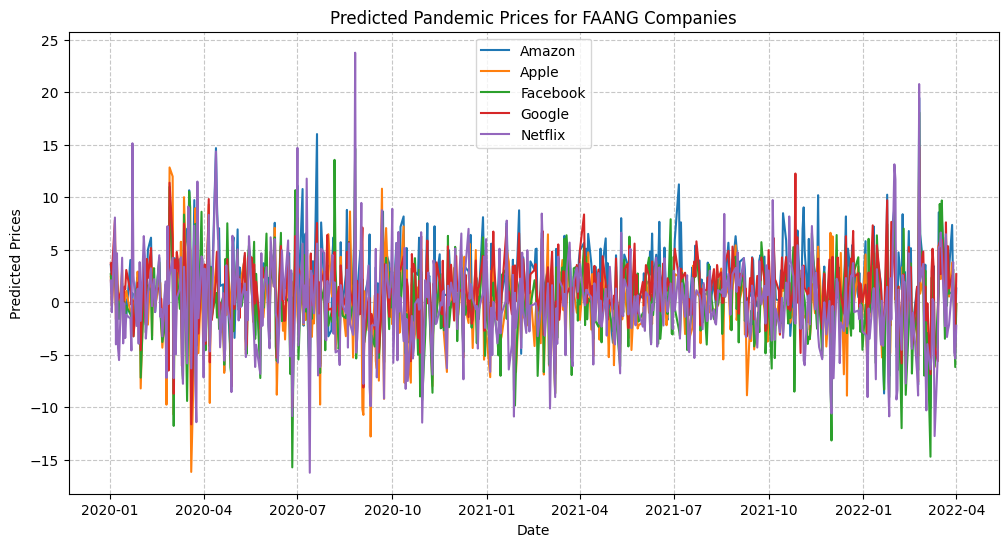

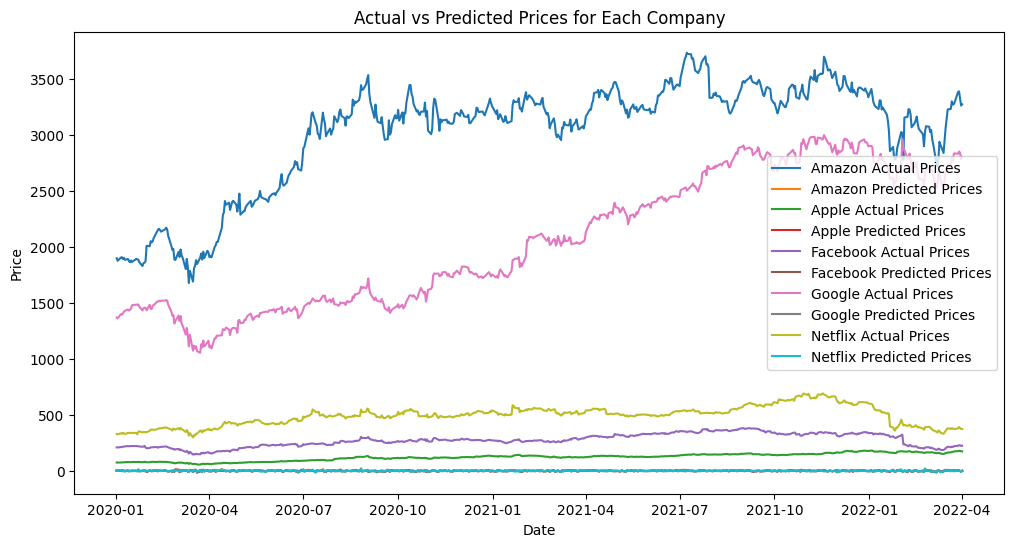


Predicted Prices for Each Company:
Name
Amazon      1.311659
Apple      -0.153738
Facebook   -0.169115
Google      2.673073
Netflix    -2.228979
Name: Predicted_Pandemic_Prices, dtype: float64


In [187]:
# Here I would choose the best model for prediction and plot with it.
if best_model['Model'] == 'Linear Regression':
    final_model = linear_model
elif best_model['Model'] == 'Random Forest Regressor':
    final_model = rf_model
else:
    final_model = lstm_model

predicted_prices = predict_pandemic_prices(df, final_model, scaler)
df['Predicted_Pandemic_Prices'] = predicted_prices

# Plot the predictions for all FAANG companies
plt.figure(figsize=(12, 6))
for company, group in df.groupby('Name'):
    plt.plot(group['Date'], group['Predicted_Pandemic_Prices'], label=company)
plt.title('Predicted Pandemic Prices for FAANG Companies')
plt.xlabel('Date')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

# Plot the predictions for each company seperate plots
plt.figure(figsize=(12, 6))
for company, company_data in df.groupby('Name'):
    plt.plot(company_data['Date'], company_data['Close'], label=f'{company} Actual Prices')
    plt.plot(company_data['Date'], company_data['Predicted_Pandemic_Prices'], label=f'{company} Predicted Prices')

plt.title('Actual vs Predicted Prices for Each Company')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# Display predicted prices limit one for each comapny
print("\nPredicted Prices for Each Company:")
print(df.groupby('Name')['Predicted_Pandemic_Prices'].last())